# Useful Infomation

  > * the main dataframe in this file is called **vivian_df**

# Data Collection and Preparation

  > **In order to aviod unexpected bugs, data was prepared with both read_csv versions and API versions, if the API do not run as expected please move to cell csv and override the dataframe**
<br/><br/>link listed here<br/>
**[Move to CSV version of dataframe](#csv)**<br/>
**[Data Clean and prepared for analysis](#clean)**<br/>
**[Machine Learning](#machine)**<br/>
**[Another model not covered in Lecture](#another)**<br/>

In [124]:
# import libraries
import alpaca_trade_api as tradeapi
import os
import pandas as pd
import requests

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from dotenv import load_dotenv
%matplotlib inline

## read_API_version

In [2]:
stock = input("Please input your wishes stock tickers, seperate by ',': ")

Please input your wishes stock tickers, seperate by ',': AAPL


In [9]:
#temporarily set this stock default value to "APPL" 
stock = "AAPL"

In [3]:
# set up this line of variables for customer to change
customer_request_starting_date = "2021-01-01"
customer_request_ending_date = "2021-12-31"
tickers = stock.split(",")

In [4]:
#modify the time which customers provied in ISO format
load_dotenv()
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [6]:
#modify the time which customers provied in ISO format
start_date = pd.Timestamp(customer_request_starting_date, tz = "America/New_York").isoformat()
end_date = pd.Timestamp(customer_request_ending_date, tz = "America/New_York").isoformat()

timeframe = "1Day"

In [7]:
#get data from API and save it in a dataframe
df_portfolio = alpaca.get_bars(tickers, timeframe, start = start_date, end = end_date).df

In [8]:
# STEP 5: dynamically reorganized the dataframe, in this case, no matter how many stocks the
# user choose, program will distribute them in a corresponding list.
# create a list to store the separated dataframe, and each elements in the list will be a 
# relevant dataframe
temp_dataframe_list = list()
for i in tickers:
    temp_dataframe_list.append(df_portfolio[df_portfolio['symbol'] == i].drop('symbol',axis = 1))
# then we concatenate the list and named it vivian_portfolio to avoid conflicting
vivian_portfolio = pd.concat(temp_dataframe_list, axis = 1, keys = tickers)

# modify some index
vivian_portfolio.index = vivian_portfolio.index.date

# display this dataframe
vivian_portfolio

AAPL                                                    \
              open      high      low   close     volume trade_count   
2021-01-04  133.56  133.6116  126.760  129.41  143302685     1310227   
2021-01-05  128.98  131.7400  128.430  131.01   97666310      707581   
2021-01-06  127.53  131.0499  126.382  126.60  155088164     1202577   
2021-01-07  128.38  131.6300  127.860  130.92  109578109      718358   
2021-01-08  132.50  132.6300  130.230  132.05  105158275      800070   
...            ...       ...      ...     ...        ...         ...   
2021-12-27  177.10  180.4200  177.070  180.33   74928619      629427   
2021-12-28  180.20  181.3300  178.530  179.29   79103834      631315   
2021-12-29  179.30  180.6300  178.140  179.38   62325923      491575   
2021-12-30  179.59  180.5700  178.090  178.20   59770363      498610   
2021-12-31  178.00  179.2300  177.260  177.57   64038545      451475   

                        
                  vwap  
2021-01-04  129.732580  
2021-01-05  130.717947  
2021-01-06  128.350213  
2021-01-07  130.153869  
2021-01-08  131.565744  
...                ...  
2021-12-27  179.056781  
2021-12-28  179.707003  
2021-12-29  179.455692  
2021-12-30  179.374496  
2021-12-31  177.800284  

[252 rows x 7 columns]

In [48]:
# copy this datafame and name it vivian_df
vivian_df = vivian_portfolio.copy()
vivian_df = vivian_df.droplevel(level = 0, axis = 1)
vivian_df.index.name = "date"

In [51]:
# create a csv file based on this dataframe to aviod futher error
csv_data = vivian_df.to_csv()
file = open("stock_aapl.csv", "w")
file.writelines(csv_data)
file.close()

<a id="csv"></a>   
## read_csv_version

  > please remove the hash tag if you prefer to use read_csv function

In [70]:
vivian_df = pd.read_csv("stock_aapl.csv", index_col = "date", infer_datetime_format = True, parse_dates = True)

In [55]:
display(vivian_df.head())
display(vivian_df.tail())

,open,high,low,close,volume,trade_count,vwap
date,,,,,,,
2021-12-27,177.10,180.42,177.07,180.33,74928619,629427,179.056781
2021-12-28,180.20,181.33,178.53,179.29,79103834,631315,179.707003
2021-12-29,179.30,180.63,178.14,179.38,62325923,491575,179.455692
2021-12-30,179.59,180.57,178.09,178.20,59770363,498610,179.374496
2021-12-31,178.00,179.23,177.26,177.57,64038545,451475,177.800284


,open,high,low,close,volume,trade_count,vwap
date,,,,,,,
2021-12-27,177.10,180.42,177.07,180.33,74928619,629427,179.056781
2021-12-28,180.20,181.33,178.53,179.29,79103834,631315,179.707003
2021-12-29,179.30,180.63,178.14,179.38,62325923,491575,179.455692
2021-12-30,179.59,180.57,178.09,178.20,59770363,498610,179.374496
2021-12-31,178.00,179.23,177.26,177.57,64038545,451475,177.800284


  > draw a candle stick for this appl stock

In [59]:
import plotly.graph_objects as go
candle = vivian_df
fig = go.Figure(data = [go.Candlestick(x = candle.index, open = candle['open'], 
                                       high = candle['high'],low= candle['low'],
                                       close = candle['close'], 
                                       increasing_line_color = 'pink', 
                                       decreasing_line_color = 'black')])
fig.update_layout(title = "AAPL STOCK CANDLE")

## Data prepare for Machine Learning
<a id="clean"></a>

In [71]:
vivian_df["actual_returns"] = vivian_df["close"].pct_change()
vivian_df = vivian_df.dropna()
vivian_df.head()

,open,high,low,close,volume,trade_count,vwap,actual_returns
date,,,,,,,,
2021-01-05,128.98,131.7400,128.430,131.01,97666310,707581,130.717947,0.012364
2021-01-06,127.53,131.0499,126.382,126.60,155088164,1202577,128.350213,-0.033662
2021-01-07,128.38,131.6300,127.860,130.92,109578109,718358,130.153869,0.034123
2021-01-08,132.50,132.6300,130.230,132.05,105158275,800070,131.565744,0.008631
2021-01-11,129.00,130.1700,128.500,128.98,100645853,775071,129.323137,-0.023249


In [72]:
# define a short window and a long window
short_window = 4
long_window = 30

In [73]:
vivian_df['sma_fast'] = vivian_df['close'].rolling(window=short_window).mean()
vivian_df['sma_slow'] = vivian_df['close'].rolling(window=long_window).mean()


In [74]:
vivian_df = vivian_df.dropna()
vivian_df.head()

,open,high,low,close,volume,trade_count,vwap,actual_returns,sma_fast,sma_slow
date,,,,,,,,,,
2021-02-17,131.23,132.220,129.47,130.84,98145249,971321,130.590282,-0.017644,133.6325,133.945000
2021-02-18,129.22,129.995,127.41,129.71,96857045,859577,128.861037,-0.008637,132.2775,133.901667
2021-02-19,130.16,130.710,128.80,129.87,87669018,683765,129.766463,0.001234,130.9025,134.010667
2021-02-22,127.99,129.720,125.60,126.00,103916715,969989,127.045252,-0.029799,129.1050,133.846667
2021-02-23,123.79,126.710,118.39,125.86,158276544,1547491,123.307262,-0.001111,127.8600,133.640333


In [75]:
vivian_df['signal'] = 0.0
vivian_df.loc[(vivian_df['actual_returns'] >= 0), 'signal'] = 1
vivian_df.loc[(vivian_df['actual_returns'] < 0), 'signal'] = -1

In [76]:
vivian_df.head()

,open,high,low,close,volume,trade_count,vwap,actual_returns,sma_fast,sma_slow,signal
date,,,,,,,,,,,
2021-02-17,131.23,132.220,129.47,130.84,98145249,971321,130.590282,-0.017644,133.6325,133.945000,-1.0
2021-02-18,129.22,129.995,127.41,129.71,96857045,859577,128.861037,-0.008637,132.2775,133.901667,-1.0
2021-02-19,130.16,130.710,128.80,129.87,87669018,683765,129.766463,0.001234,130.9025,134.010667,1.0
2021-02-22,127.99,129.720,125.60,126.00,103916715,969989,127.045252,-0.029799,129.1050,133.846667,-1.0
2021-02-23,123.79,126.710,118.39,125.86,158276544,1547491,123.307262,-0.001111,127.8600,133.640333,-1.0


## Finally, we have our X, and y value

In [86]:
original_X = vivian_df[['sma_fast', 'sma_slow']].dropna().copy()
original_y = vivian_df['signal'].copy()

In [87]:
original_X.head()

,sma_fast,sma_slow
date,,
2021-02-17,133.6325,133.945000
2021-02-18,132.2775,133.901667
2021-02-19,130.9025,134.010667
2021-02-22,129.1050,133.846667
2021-02-23,127.8600,133.640333


In [88]:
original_y.head()

date
2021-02-17   -1.0
2021-02-18   -1.0
2021-02-19    1.0
2021-02-22   -1.0
2021-02-23   -1.0
Name: signal, dtype: float64

---
---

# Machine Learning
<a id="machine"></a>

**Split the data**

In [97]:
X = original_X
y = original_y
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [93]:
display(X_train.head())
display(X_test.head())

,sma_fast,sma_slow
date,,
2021-08-16,148.7425,146.346333
2021-03-16,123.1375,127.715167
2021-04-07,125.7525,122.454833
2021-08-10,146.2225,144.864667
2021-08-12,146.6100,145.580000


,sma_fast,sma_slow
date,,
2021-04-20,134.14125,125.696253
2021-12-06,163.92250,154.808000
2021-03-17,123.83750,127.374167
2021-08-30,149.40500,147.574333
2021-09-20,146.70500,149.555667


**Scale the data**

In [98]:
scaler = StandardScaler()
scaler_fit = scaler.fit(X_train)


In [99]:
X_train_scale = scaler_fit.transform(X_train)
X_test_scale = scaler_fit.transform(X_test)

In [100]:
display(X_train_scale[0:5])
display(X_test_scale[0:5])

array([[-1.45842411, -0.90029417],
       [-0.83699179, -0.46635913],
       [-1.17577183, -0.57006543],
       [ 0.30334954,  0.3011306 ],
       [-0.7328744 , -1.36846348]])

array([[ 2.11672045,  2.02735171],
       [ 0.46560823,  0.48460217],
       [ 0.2634141 ,  0.2579507 ],
       [ 0.05853524, -0.67425916],
       [-1.15462953, -0.96223984]])

**Model Created**

In [101]:
logistic_regression_model = LogisticRegression()

**Fit the model**

In [102]:
logistic_regression_model.fit(X_train_scale, y_train)

LogisticRegression()

**Predict the model**

In [111]:
training_predictions = logistic_regression_model.predict(X_train_scale)
testing_predictions = logistic_regression_model.predict(X_test_scale)

**Evaluate the model**

In [113]:
training_matrix = confusion_matrix(y_train, training_predictions)
print(training_matrix)

[[ 2 73]
 [ 0 91]]


In [116]:
training_report = classification_report(y_train, training_predictions)
print(training_report)

              precision    recall  f1-score   support

        -1.0       1.00      0.03      0.05        75
         1.0       0.55      1.00      0.71        91

    accuracy                           0.56       166
   macro avg       0.78      0.51      0.38       166
weighted avg       0.76      0.56      0.41       166



In [117]:
testing_matrix = confusion_matrix(y_test, testing_predictions)
testing_report = classification_report(y_test, testing_predictions)

In [119]:
print(testing_matrix)
print(testing_report)

[[ 0 28]
 [ 1 27]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        28
         1.0       0.49      0.96      0.65        28

    accuracy                           0.48        56
   macro avg       0.25      0.48      0.33        56
weighted avg       0.25      0.48      0.33        56



## Another model not covered in Lecture
<a id="another"><a/>


In [128]:
features = ["sma_fast", "sma_slow"]
dtree = DecisionTreeClassifier()

**fit the data**

In [129]:
dtree = dtree.fit(X_train, y_train)

[Text(0.3848101265822785, 0.975, 'sma_slow <= 122.881\ngini = 0.495\nsamples = 166\nvalue = [75, 91]'),
 Text(0.36455696202531646, 0.925, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.4050632911392405, 0.925, 'sma_fast <= 134.33\ngini = 0.498\nsamples = 160\nvalue = [75, 85]'),
 Text(0.2936708860759494, 0.875, 'sma_fast <= 133.966\ngini = 0.488\nsamples = 64\nvalue = [37, 27]'),
 Text(0.27341772151898736, 0.825, 'sma_slow <= 129.435\ngini = 0.493\nsamples = 61\nvalue = [34, 27]'),
 Text(0.14177215189873418, 0.775, 'sma_slow <= 123.469\ngini = 0.499\nsamples = 38\nvalue = [18, 20]'),
 Text(0.12151898734177215, 0.725, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1620253164556962, 0.725, 'sma_fast <= 121.36\ngini = 0.494\nsamples = 36\nvalue = [16, 20]'),
 Text(0.14177215189873418, 0.675, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.18227848101265823, 0.675, 'sma_fast <= 133.856\ngini = 0.498\nsamples = 34\nvalue = [16, 18]'),
 Text(0.1620253164556962, 0.625, 'sma_fast

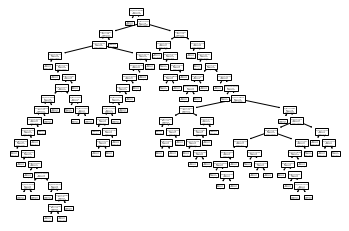

In [130]:
tree.plot_tree(dtree, feature_names=features)

**predict data**

In [134]:
result = dtree.predict(X_test)


In [132]:
print(result)

[-1.  1.  1.  1.  1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1. -1.  1. -1.
 -1.  1.  1.  1.  1.  1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.
  1. -1. -1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1.
  1. -1.]
